In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/movies project

/content/drive/MyDrive/movies project


**Importing the packages I will be using for this project**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain
import numpy as np
pd.__version__

'1.3.5'

**Exploratory Data Analysis with First Dataset**

In [ ]:
df = pd.read_csv("bom.movie_gross.csv")
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [ ]:
df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


Converting Dtype of foreign_gross as float

In [ ]:
df['foreign_gross'] = df['foreign_gross'].str.replace(",", "")

In [ ]:
df['foreign_gross'] = df['foreign_gross'].astype(float, errors = 'raise')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


*Getting* counts for each value in studio column

In [ ]:
df['studio'].value_counts()

IFC           166
Uni.          147
WB            140
Fox           136
Magn.         136
             ... 
E1              1
PI              1
ELS             1
PalT            1
Synergetic      1
Name: studio, Length: 257, dtype: int64

In [ ]:
len(df.studio.unique())

258

Creating Column of Total Gross for Movies by summing up domestic_gross and foreign gross


In [ ]:
sum_column = df["domestic_gross"] + df["foreign_gross"]
df["total_gross"] = sum_column
df.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


Getting count for each year to see which year released most films

In [ ]:
df['year'].value_counts()


2015    450
2016    436
2012    400
2011    399
2014    395
2013    350
2010    328
2017    321
2018    308
Name: year, dtype: int64

**Highest Earned Movies on Domestic Level**

In [ ]:
sorted = df.sort_values(by='domestic_gross', ascending=False)
sorted=sorted[['title','studio', 'domestic_gross']].head(10)
sorted

,title,studio,domestic_gross
1872,Star Wars: The Force Awakens,BV,936700000.0
3080,Black Panther,BV,700100000.0
3079,Avengers: Infinity War,BV,678800000.0
1873,Jurassic World,Uni.,652300000.0
727,Marvel's The Avengers,BV,623400000.0
2758,Star Wars: The Last Jedi,BV,620200000.0
3082,Incredibles 2,BV,608600000.0
2323,Rogue One: A Star Wars Story,BV,532200000.0
2759,Beauty and the Beast (2017),BV,504000000.0
2324,Finding Dory,BV,486300000.0


Studios With Highest Success on Domestic Level

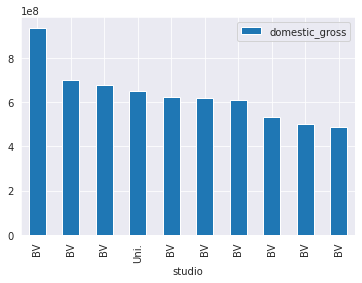

In [ ]:

sorted.plot(x="studio", y="domestic_gross", kind="bar")


Highest Earned Movies on Foreign Level

In [ ]:
sorted = df.sort_values(by='foreign_gross', ascending=False)
sorted=sorted[['title', 'studio', 'foreign_gross']].head(10)
sorted

,title,studio,foreign_gross
328,Harry Potter and the Deathly Hallows Part 2,WB,960500000.0
1875,Avengers: Age of Ultron,BV,946400000.0
727,Marvel's The Avengers,BV,895500000.0
3081,Jurassic World: Fallen Kingdom,Uni.,891800000.0
1127,Frozen,BV,875700000.0
2764,Wolf Warrior 2,HC,867600000.0
1477,Transformers: Age of Extinction,Par.,858600000.0
1876,Minions,Uni.,823400000.0
3083,Aquaman,WB,812700000.0
1128,Iron Man 3,BV,805800000.0


Studios With Highest Success on Foreign Level

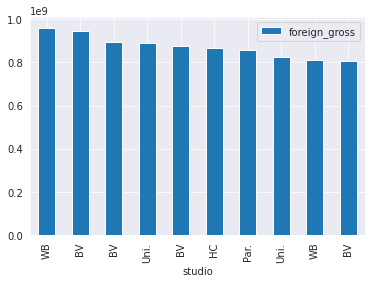

In [ ]:
sorted.plot(x="studio", y="foreign_gross", kind="bar")


Overall Top 10 Highest Earning Movies

In [ ]:
sorted = df.sort_values(by='total_gross', ascending=False)
sorted=sorted[['title','studio', 'total_gross']].head(10)
sorted

,title,studio,total_gross
727,Marvel's The Avengers,BV,1.518900e+09
1875,Avengers: Age of Ultron,BV,1.405400e+09
3080,Black Panther,BV,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,1.341500e+09
2758,Star Wars: The Last Jedi,BV,1.332600e+09
3081,Jurassic World: Fallen Kingdom,Uni.,1.309500e+09
1127,Frozen,BV,1.276400e+09
2759,Beauty and the Beast (2017),BV,1.263500e+09
3082,Incredibles 2,BV,1.242800e+09
1128,Iron Man 3,BV,1.214800e+09


Studios With Top 10 Highest Earned Movies

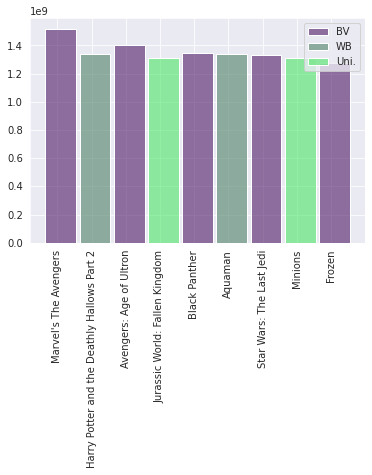

In [ ]:
plt.locator_params(axis="both", integer=True, tight=True)
# Create bars
barWidth = 0.9
bv = sorted.loc[sorted['studio'] == 'BV']['total_gross'][:5].tolist()
wb = sorted.loc[sorted['studio'] == 'WB']['total_gross'].tolist()
uni = sorted.loc[sorted['studio'] == 'Uni.']['total_gross'].tolist()
bars4 = bv + wb + uni
 
# The X position of bars
r1 = [1,3,5,7,9]
r2 = [2,6]
r3 = [4,8]
r4 = r1 + r2 + r3
 
# Create barplot
plt.bar(r1, bv, width = barWidth, color = (0.3,0.1,0.4,0.6), label='BV')
plt.bar(r2, wb, width = barWidth, color = (0.3,0.5,0.4,0.6), label='WB')
plt.bar(r3, uni, width = barWidth, color = (0.3,0.9,0.4,0.6), label='Uni.')
# Note: the barplot could be created easily. See the barplot section for other examples.
 
# Create legend
plt.legend()
 
# Text below each barplot with a rotation at 90°
plt.xticks([r + barWidth for r in range(len(r4))], ["Marvel's The Avengers", 'Harry Potter and the Deathly Hallows Part 2', 'Avengers: Age of Ultron', 'Jurassic World: Fallen Kingdom', 'Black Panther', 'Aquaman', 'Star Wars: The Last Jedi', 'Minions', 'Frozen'], rotation=90)
 


# Adjust the margins
plt.subplots_adjust(bottom= 0.2, top = 0.98)
 
# Show graphic
plt.show()

Exploratory Data Analysis With Second Dataset

In [ ]:
df = pd.read_csv("tn.movie_budgets.csv")
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Basic Information about the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [ ]:
df.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

Converting budget domestic_gross and worldwide_gross as int dtype

In [ ]:
df['production_budget'] = df['production_budget'].str.replace(',', '').str.replace('$', '').astype(int)
df['domestic_gross'] = df['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(int)
df['worldwide_gross'] = df['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


One thing I realized as soon as I began my analysis was that my dollar amounts were not very plot-friendly. I had to reassess my gross and budget columns at this point and add new columns for budget, domestic gross and world gross in millions.

In [ ]:
df['worldwide_gross_in_mil'] = df['worldwide_gross'] / 1000000
df['production_budget_in_mil'] = df['production_budget'] / 1000000
df['domestic_gross_in_mil'] = df['domestic_gross'] / 1000000
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_gross_in_mil,production_budget_in_mil,domestic_gross_in_mil
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2776.345279,425.0,760.507625
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1045.663875,410.6,241.063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,149.762350,350.0,42.762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1403.013963,330.6,459.005868
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1316.721747,317.0,620.181382


I was curious about how the timing of a release impacted the revenue. So I created a month column.


In [ ]:
# convert release date column to datetime values
df['release_date'] = pd.to_datetime(df['release_date'])
# create release month column
df['release_month'] = df['release_date'].dt.strftime('%B')

In [ ]:
# checking for successful column creation
df['release_month'].value_counts()

December     745
October      573
August       496
September    493
November     486
June         479
March        470
April        454
July         440
May          407
February     392
January      347
Name: release_month, dtype: int64

In [ ]:
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_gross_in_mil,production_budget_in_mil,domestic_gross_in_mil,release_month
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2776.345279,425.0,760.507625,December
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1045.663875,410.6,241.063875,May
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,149.762350,350.0,42.762350,June
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1403.013963,330.6,459.005868,May
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1316.721747,317.0,620.181382,December


Plotting the number of movies per release month in dataset

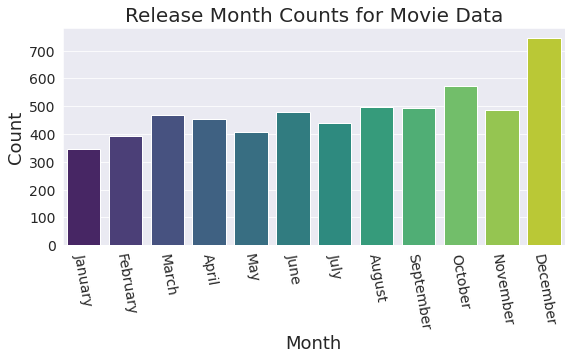

In [ ]:

plt.figure(figsize=(9,4))
months = ['January', 'February', 'March', 'April','May','June', 'July', 'August','September', 'October', 'November', 'December']
sns.countplot(x='release_month', data=df, order=months, palette='viridis')
plt.title('Release Month Counts for Movie Data', fontsize=20)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Month', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=-80);

In this dataset, movie release months were fairly evenly distributed throughout the year, with the most releases in December and the least in January.


Movies with highest Production Budget

In [ ]:
sorted = df.sort_values(by='production_budget_in_mil', ascending=False)
sorted=sorted[['movie','production_budget_in_mil', 'release_month']].head(10)
sorted

,movie,production_budget_in_mil,release_month
0,Avatar,425.0,December
1,Pirates of the Caribbean: On Stranger Tides,410.6,May
2,Dark Phoenix,350.0,June
3,Avengers: Age of Ultron,330.6,May
4,Star Wars Ep. VIII: The Last Jedi,317.0,December
5,Star Wars Ep. VII: The Force Awakens,306.0,December
6,Avengers: Infinity War,300.0,April
7,Pirates of the Caribbean: At Worldâs End,300.0,May
8,Justice League,300.0,November
9,Spectre,300.0,November


Removing Outliers

In [ ]:
Q1 = df['domestic_gross_in_mil'].quantile(0.25)
Q3 = df['domestic_gross_in_mil'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['domestic_gross_in_mil'] >= Q1 - 1.5 * IQR) & (df['domestic_gross_in_mil'] <= Q3 + 1.5 *IQR)
df.loc[filter]  

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_gross_in_mil,production_budget_in_mil,domestic_gross_in_mil,release_month
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,149.762350,350.0000,42.762350,June
12,13,2013-07-02,The Lone Ranger,275000000,89302115,260002115,260.002115,275.0000,89.302115,July
13,14,2012-03-09,John Carter,275000000,73058679,282778100,282.778100,275.0000,73.058679,March
31,32,2012-05-18,Battleship,220000000,65233400,313477717,313.477717,220.0000,65.233400,May
38,39,2010-05-14,Robin Hood,210000000,105487148,322459006,322.459006,210.0000,105.487148,May
...,...,...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,0.000000,0.0070,0.000000,December
5778,79,1999-04-02,Following,6000,48482,240495,0.240495,0.0060,0.048482,April
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,0.001338,0.0050,0.001338,July
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,0.000000,0.0014,0.000000,September


Highest Domestic Gross Movies against releasing month

In [ ]:
sorted = df.sort_values(by='domestic_gross_in_mil', ascending=False)
sorted=sorted[['movie','domestic_gross_in_mil', 'release_month']].head(10)
sorted

,movie,domestic_gross_in_mil,release_month
5,Star Wars Ep. VII: The Force Awakens,936.662225,December
0,Avatar,760.507625,December
41,Black Panther,700.059566,February
6,Avengers: Infinity War,678.815482,April
42,Titanic,659.363944,December
33,Jurassic World,652.270625,June
26,The Avengers,623.279547,May
4,Star Wars Ep. VIII: The Last Jedi,620.181382,December
43,Incredibles 2,608.581744,June
74,The Dark Knight,533.720947,July


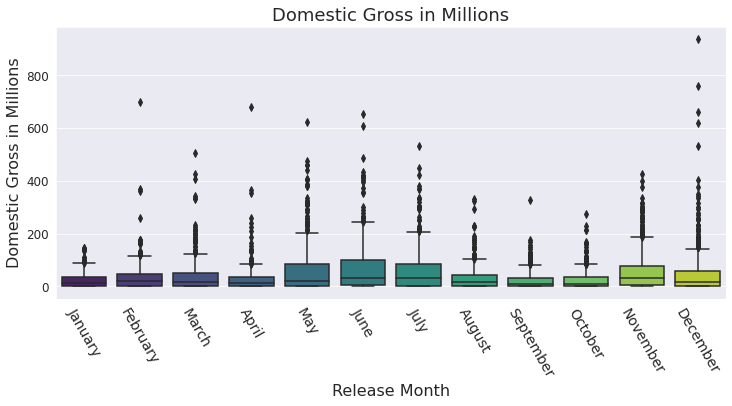

In [ ]:
plt.figure(figsize=(12, 5))
sns.set_style('darkgrid')
months = ['January', 'February', 'March', 'April','May','June', 'July', 'August','September', 'October', 'November', 'December']
sns.boxplot(x='release_month', y='domestic_gross_in_mil', data=df, order=months, palette='viridis')
plt.xticks(rotation=-60)
plt.ylabel('Domestic Gross in Millions', fontsize=16)
plt.xlabel('Release Month', fontsize = 16)
plt.title('Domestic Gross in Millions', fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12);

Highest Worldwide Gross Movies against releasing month

In [ ]:
sorted = df.sort_values(by='worldwide_gross_in_mil', ascending=False)
sorted=sorted[['movie','worldwide_gross_in_mil', 'release_month']].head(10)
sorted

,movie,worldwide_gross_in_mil,release_month
0,Avatar,2776.345279,December
42,Titanic,2208.208395,December
5,Star Wars Ep. VII: The Force Awakens,2053.311220,December
6,Avengers: Infinity War,2048.134200,April
33,Jurassic World,1648.854864,June
66,Furious 7,1518.722794,April
26,The Avengers,1517.935897,May
3,Avengers: Age of Ultron,1403.013963,May
41,Black Panther,1348.258224,February
260,Harry Potter and the Deathly Hallows: Part II,1341.693157,July


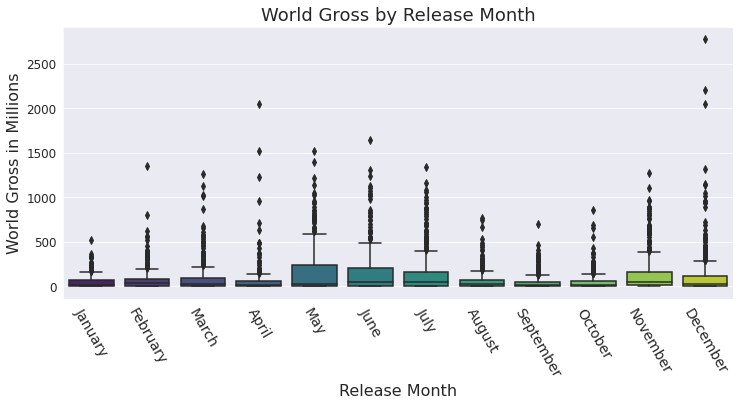

In [ ]:
# generating boxplots of world gross by release month
plt.figure(figsize=(12, 5))
sns.set_style('darkgrid')
months = ['January', 'February', 'March', 'April','May','June', 'July', 'August','September', 'October', 'November', 'December']
sns.boxplot(x='release_month', y='worldwide_gross_in_mil', data=df, order=months, palette='viridis')
plt.xticks(rotation=-60)
plt.ylabel('World Gross in Millions', fontsize=16)
plt.xlabel('Release Month', fontsize = 16)
plt.title('World Gross by Release Month', fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12);

Production Budget: What budget amount tends to achieve the highest box office gross?


In [ ]:
# generating correlations
corr=df.drop(df.columns[[0, 1,2,3,4,5]], axis = 1, inplace = True)

corr = df.corr()
corr

,worldwide_gross_in_mil,production_budget_in_mil,domestic_gross_in_mil
worldwide_gross_in_mil,1.000000,0.748306,0.938853
production_budget_in_mil,0.748306,1.000000,0.685682
domestic_gross_in_mil,0.938853,0.685682,1.000000


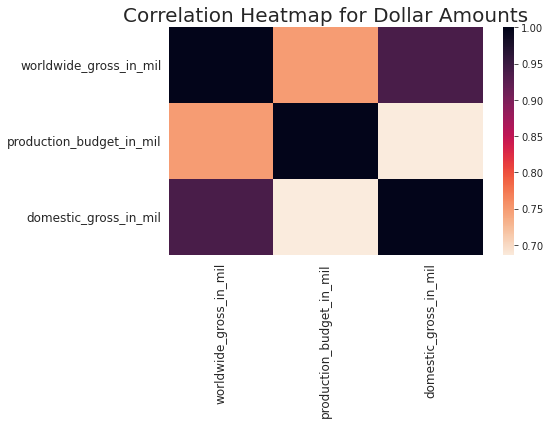

In [ ]:
# plotting heatmap of correlations
plt.figure(figsize=(8,6))
plt.title("Correlation Heatmap for Dollar Amounts", fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
sns.heatmap(corr, cmap='rocket_r');
#saved in images as fig19
plt.tight_layout()

The heatmap shows darker colors where two values are highly correlated and lighter colors where there is less of a correlation. It was clear from both the correlation method and the heatmap that there was a strong correlation between budget and world gross, as well as budget and international gross. While the correlation between budget and domestic gross was not quite as strong, it was still right at the threshold of a high correlation. From this visualization, I could conclude that, generally speaking, the more money you put into a movie, the more money you are likely to make from it.

Exploratory Data Analysis with Third Dataset

In [ ]:
tmdb = pd.read_csv('tmdb.movies.csv', index_col=0, parse_dates=['release_date'])

Creating New Column of release_year using the date column

In [ ]:
tmdb['release_year'] = tmdb.release_date.dt.year

In [ ]:
tmdb.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010


Representing Basic Info of the dataset

In [ ]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          26517 non-null  object        
 1   id                 26517 non-null  int64         
 2   original_language  26517 non-null  object        
 3   original_title     26517 non-null  object        
 4   popularity         26517 non-null  float64       
 5   release_date       26517 non-null  datetime64[ns]
 6   title              26517 non-null  object        
 7   vote_average       26517 non-null  float64       
 8   vote_count         26517 non-null  int64         
 9   release_year       26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 2.2+ MB


In [ ]:
tmdb.original_language.value_counts()

en    23291
fr      507
es      455
ru      298
ja      265
      ...  
bo        1
si        1
sl        1
hz        1
dz        1
Name: original_language, Length: 76, dtype: int64

Almost all the movies are in the English Language

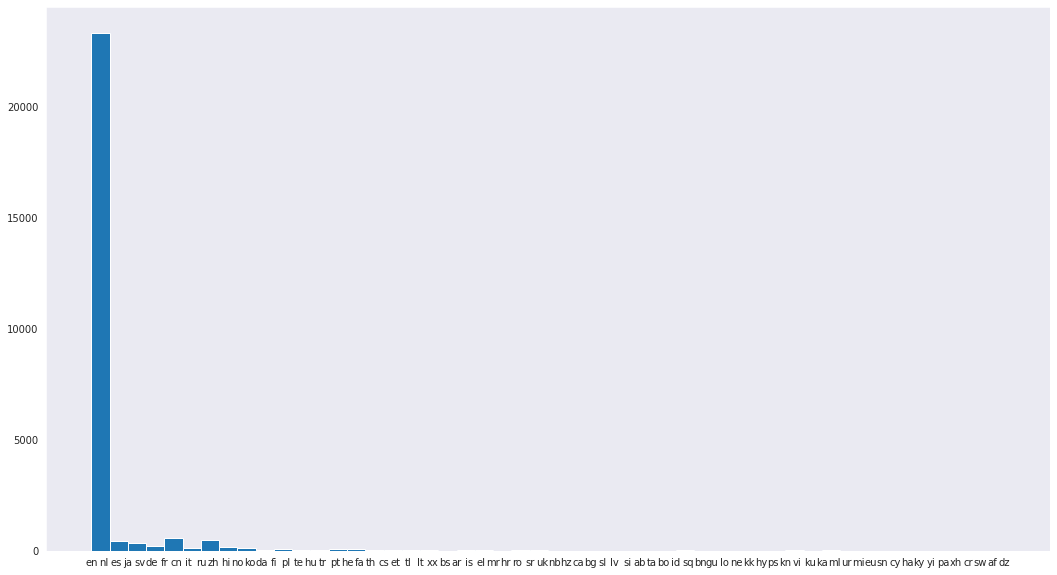

In [ ]:
tmdb.original_language.hist(figsize=(18, 10),bins=50,grid=False)

The correlation between Vote Average and Vote Count

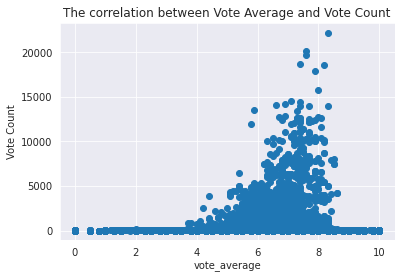

In [ ]:
plt.scatter(x=tmdb.vote_average, y=tmdb.vote_count)
plt.title('The correlation between Vote Average and Vote Count')
plt.xlabel('vote_average')
plt.ylabel('Vote Count')

plt.show()

We can see that most movies lies between 4 to 8 in vote average and we can see that vote average is increasing with vote counts which shows highly positive collinearity.

Preparing the Data for use

In [ ]:
tmdb_genres = tmdb[['release_year', 'genre_ids', 'popularity']]
tmdb_genres.head()

,release_year,genre_ids,popularity
0,2010,"[12, 14, 10751]",33.533
1,2010,"[14, 12, 16, 10751]",28.734
2,2010,"[12, 28, 878]",28.515
3,1995,"[16, 35, 10751]",28.005
4,2010,"[28, 878, 12]",27.920


In [ ]:
tmdb_genres['genre_ids'] = tmdb_genres.genre_ids.str.replace('[','')
tmdb_genres['genre_ids'] = tmdb_genres.genre_ids.str.replace(' ','')
tmdb_genres['genre_ids'] = tmdb_genres.genre_ids.str.replace(']','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

Return a dataframe with movies having multiple genres as separate rows.

In [ ]:
# Return list from series of ','-separated strings
def chainer(s):
    return list(chain.from_iterable(s.str.split(',')))

# Calculate lengths of splits
lens = tmdb_genres['genre_ids'].str.split(',').map(len)

# Create new dataframe, repeating or chaining as appropriate
df_genres = pd.DataFrame({'release_year': np.repeat(tmdb_genres['release_year'], lens),                       
                          'genres': chainer(tmdb_genres['genre_ids']),
                          'popularity': np.repeat(tmdb_genres['popularity'], lens)})

df_genres.head()

,release_year,genres,popularity
0,2010,12,33.533
0,2010,14,33.533
0,2010,10751,33.533
1,2010,14,28.734
1,2010,12,28.734


Replacing Genre ID'S with their respective Geners

In [ ]:
df_genres.drop(df_genres[df_genres['genres'] == ''].index,inplace=True)

In [ ]:
df_genres.replace({'genres':{'12' : 'Adventure', '28' : 'Action', '16' : 'Animation', '35' : 'Comedy', '80' : 'Crime', '99' : 'Documentary', 
                             '18' : 'Drama', '10751' : 'Family', '14' : 'Fantasy', '36' : 'History', '27' : 'Horror', '10402' : 'Music', 
                             '9648' : 'Mystery', '10749' : 'Romance', '878' : 'Science_Fiction', '10770' : 'TV_Movie', '53' : 'Thriller', 
                             '10752' : 'War', '37' : 'Western' }}, inplace=True)

In [ ]:
# A function is defined for the selection
def func(group):
    return group.loc[group['popularity'] == group['popularity'].max()]

#Calculate the mean popularity for each genre in each year
df_pop = df_genres.groupby(['release_year', 'genres'], as_index=False).mean()

# Select the most popular genre for each year
df_most_pop = df_pop.groupby('release_year', as_index=False).apply(func).reset_index(drop=True)
df_most_pop.head()

,release_year,genres,popularity
0,1930,Drama,9.583
1,1930,War,9.583
2,1933,Horror,2.292
3,1933,Thriller,2.292
4,1936,Comedy,1.653


We can see that most number of movies have Drama as genere and Westren genere has the least number of movies. 

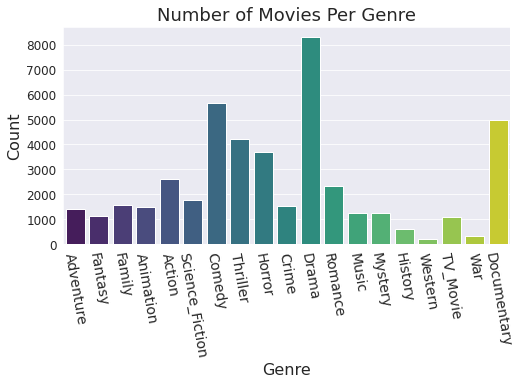

In [ ]:
# plotting the number of movies per genre in dataset
plt.figure(figsize=(8,4))
sns.countplot(x='genres', data=df_genres, palette='viridis')
plt.title('Number of Movies Per Genre', fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Genre', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=-80);
#saved in images as fig1
#plt.tight_layout()
#plt.savefig('./images/fig1.png')

Drawing the scatterplot to show the change of the most popular genre over the years.

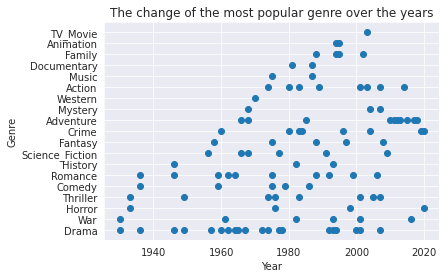

In [ ]:

plt.scatter(df_most_pop.release_year, df_most_pop.genres)
plt.title('The change of the most popular genre over the years')
plt.xlabel('Year')
plt.ylabel('Genre')

plt.show()

Pie chart showing the percentage of each genre in dataset


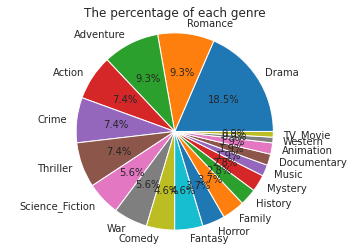

In [ ]:
sizes = df_most_pop.genres.value_counts().values
labels = df_most_pop.genres.value_counts().index

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.title('The percentage of each genre')

plt.show()

In conclusion, I would recommend that Microsoft release the movie with these four specific recommendations that have proven to be successful combinations:
an adventure movie with the slight focus on crime
with a production budget of 150 to 200 million dollars
should be released in June or December
Should take inspiration from BV or WB studios







